In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing data from kaggle using API

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
!kaggle datasets download -d kazanova/sentiment140 
!unzip sentiment140.zip

 90% 73.0M/80.9M [00:00<00:00, 134MB/s] 
100% 80.9M/80.9M [00:00<00:00, 117MB/s]
Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [25]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

Loading data and performing EDA

In [4]:
df = pd.read_csv("/content/training.1600000.processed.noemoticon.csv", encoding="ISO-8859-1", names = ['sentiment','ids','date','flag','user','text'])


In [5]:
df.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df.shape

(1600000, 6)

In [7]:
np.sum(df.isnull())

sentiment    0
ids          0
date         0
flag         0
user         0
text         0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   ids        1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [15]:
df['sentiment'] = df['sentiment'].replace(4,1)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

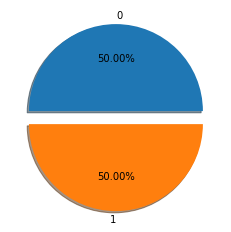

In [17]:
sentiment = df['sentiment'].value_counts()
plt.pie(sentiment, explode=[0.05, 0.1], labels=sentiment.index, radius=1, autopct='%1.2f%%',  shadow=True)
plt.show()

In [14]:
df = df.drop(['ids', 'date', 'flag', 'user'], axis = 1)
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [18]:
text = list(df['text'])

In [19]:
text[0:10]

["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ",
 '@Kwesidei not the whole crew ',
 'Need a hug ',
 "@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?",
 "@Tatiana_K nope they didn't have it ",
 '@twittera que me muera ? ']

In [20]:
sentiment = list(df['sentiment'])

In [21]:
sentiment[1:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [31]:
df_positive = df[df['sentiment'] == 1]
df_negative = df[df['sentiment'] == 0]
print(len(df_positive), len(df_negative))

800000 800000


In [32]:
df_positive = df_positive.iloc[:int(len(df_positive)/4)]
df_negative = df_negative.iloc[:int(len(df_negative)/4)]
print(len(df_positive), len(df_negative))

200000 200000


In [33]:
df = pd.concat([df_positive, df_negative])
len(df)

400000

In [23]:
import nltk 
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------

Download which package (l=list; x=cancel)?


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Unzipping grammars/book_grammars.zip.
       | Downloading 


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [24]:
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

Stopwords

In [34]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'until', 'aren', 'in', 'while', 'same', 'doing', 'into', 'off', "weren't", 'this', 'ourselves', 'her', 's', "didn't", 'not', 'because', 't', 'there', "hasn't", 'myself', 'each', 'theirs', 'don', 'a', 'which', 'they', 'be', 'against', 'just', 'so', 'down', 'over', 'm', 'ma', 'couldn', "mightn't", 'ours', 'what', "that'll", 'nor', 'shan', 'you', 'does', 'after', 'ain', 'too', 'here', 'll', 'once', 'from', "aren't", 'has', 'further', 'most', 'should', 'than', 'd', 'hasn', 'yourself', "it's", 'below', 'up', 'on', 'as', 'our', 'during', 'whom', 'more', 'no', 'y', 'very', 'them', 'who', "she's", 'between', 'him', 'if', "mustn't", 'we', 'needn', 'under', "couldn't", 'those', 'was', 'all', 'will', 'haven', 'hers', "don't", 'that', "hadn't", 'have', 'but', 'weren', 'were', 'did', 'am', 'doesn', "shan't", 'an', 'out', 'hadn', "you're", 'isn', 'herself', 'your', 'me', 'do', 'few', 'i', 'themselves', "needn't", 'own', "won't", "you'll", 'then', 'through', 'my', 'when', 'its', 'at', 'yourselves', 

Tokenization

In [35]:
tk = TweetTokenizer(reduce_len=True)

data = []

X = df['text'].tolist()
Y = df['sentiment'].tolist()

for x, y in zip(X, Y):
    if y == 4:
        data.append((tk.tokenize(x), 1))
    else:
        data.append((tk.tokenize(x), 0))

data[:5]

[(['I', 'LOVE', '@Health4UandPets', 'u', 'guys', 'r', 'the', 'best', '!', '!'],
  0),
 (['im',
   'meeting',
   'up',
   'with',
   'one',
   'of',
   'my',
   'besties',
   'tonight',
   '!',
   'Cant',
   'wait',
   '!',
   '!',
   '-',
   'GIRL',
   'TALK',
   '!',
   '!'],
  0),
 (['@DaRealSunisaKim',
   'Thanks',
   'for',
   'the',
   'Twitter',
   'add',
   ',',
   'Sunisa',
   '!',
   'I',
   'got',
   'to',
   'meet',
   'you',
   'once',
   'at',
   'a',
   'HIN',
   'show',
   'here',
   'in',
   'the',
   'DC',
   'area',
   'and',
   'you',
   'were',
   'a',
   'sweetheart',
   '.'],
  0),
 (['Being',
   'sick',
   'can',
   'be',
   'really',
   'cheap',
   'when',
   'it',
   'hurts',
   'too',
   'much',
   'to',
   'eat',
   'real',
   'food',
   'Plus',
   ',',
   'your',
   'friends',
   'make',
   'you',
   'soup'],
  0),
 (['@LovesBrooklyn2', 'he', 'has', 'that', 'effect', 'on', 'everyone'], 0)]

Lemmatization

In [36]:
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

lemmatize_sentence(data[0][0])

['I', 'LOVE', '@Health4UandPets', 'u', 'guy', 'r', 'the', 'best', '!', '!']

Cleaning the text

In [37]:
import re, string

def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in nltk.pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

remove_noise(data[0][0])

['i', 'love', 'u', 'guy', 'r', 'the', 'best']

In [39]:
def list_to_dict(cleaned_tokens):
    return dict([token, True] for token in cleaned_tokens)

cleaned_tokens_list = []

for tokens, label in data:
    cleaned_tokens_list.append((remove_noise(tokens), label))

cleaned_tokens_list[1]

(['im',
  'meet',
  'up',
  'with',
  'one',
  'of',
  'my',
  'besties',
  'tonight',
  'cant',
  'wait',
  'girl',
  'talk'],
 0)

In [43]:
df = pd.DataFrame(cleaned_tokens_list)
df['sentiment'] = Y
df = df[[0,'sentiment']]
df.columns=['text', 'sentiment']
df.head()

,text,sentiment
0,"[i, love, u, guy, r, the, best]",1
1,"[im, meet, up, with, one, of, my, besties, ton...",1
2,"[thanks, for, the, twitter, add, sunisa, i, ge...",1
3,"[being, sick, can, be, really, cheap, when, it...",1
4,"[he, have, that, effect, on, everyone]",1


In [45]:
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x]))

In [46]:
df.head()

,text,sentiment
0,i love u guy r the best,1
1,im meet up with one of my besties tonight cant...,1
2,thanks for the twitter add sunisa i get to mee...,1
3,being sick can be really cheap when it hurt to...,1
4,he have that effect on everyone,1


In [50]:
from wordcloud import WordCloud, STOPWORDS

In [52]:
positive_data = df[df['sentiment']==1]
negative_data = df[df['sentiment']==0]

Wordcloud for Positive Sentiments

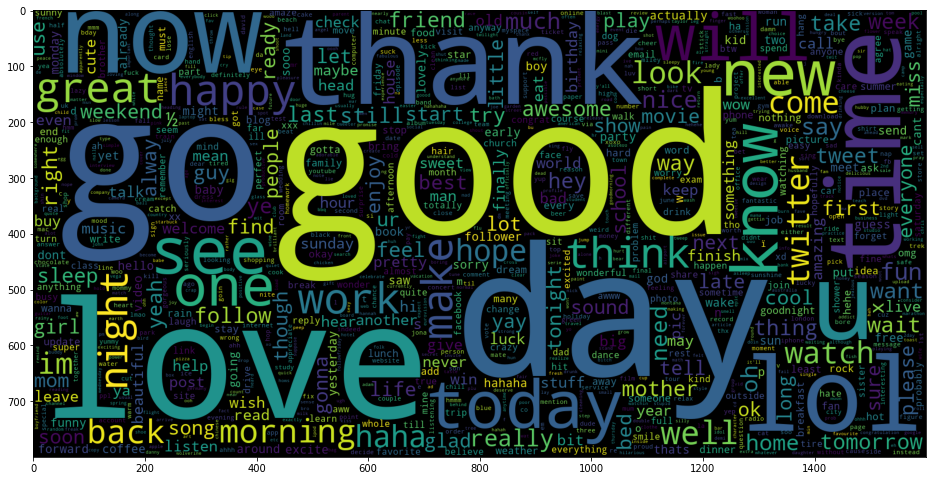

In [57]:
plt.figure(figsize = (16,16))
wc = WordCloud(stopwords = STOPWORDS,  
               max_words = 1000, width = 1600, height =800, 
               collocations=False).generate(" ".join(positive_data['text']))
plt.imshow(wc)

Wordcloud for Negative Sentiments

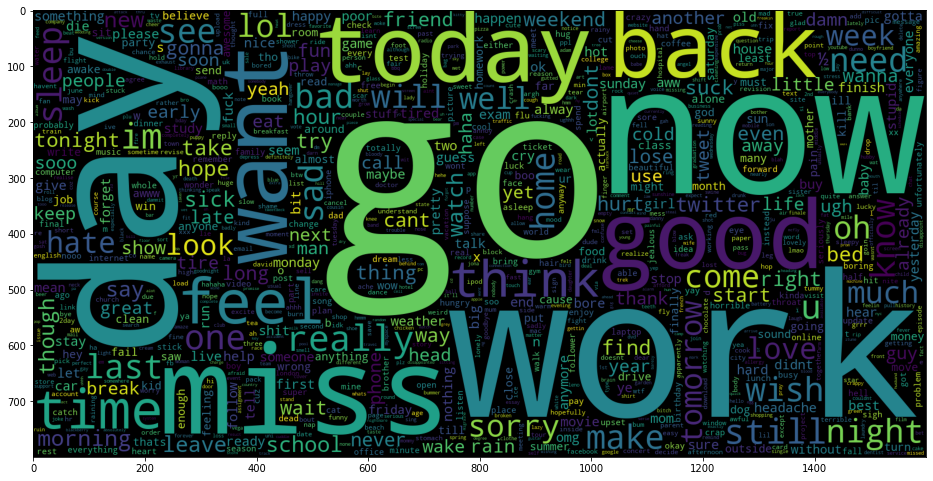

In [58]:
plt.figure(figsize = (16,16))
wc = WordCloud(stopwords = STOPWORDS,  
               max_words = 1000, width = 1600, height =800, 
               collocations=False).generate(" ".join(negative_data['text']))
plt.imshow(wc)

Splitting the data

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
train, test = train_test_split(df, test_size=0.2, random_state=1)
X_train = train['text'].values
X_test = test['text'].values
y_train = train['sentiment']
y_test = test['sentiment']

TF-IDF Vectorizer

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  500000


In [63]:
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)
print(f'Data Transformed')

Data Transformed


In [69]:
from sklearn.metrics import confusion_matrix, classification_report

def model_evaluation(model):
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))

  conf_matrix = confusion_matrix(y_test, y_pred)
  categories  = ['Negative','Positive']
  group_names = ['True Negative','False Positive', 'False Negative','True Positive']
  group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten() / np.sum(conf_matrix)]
  labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(conf_matrix, annot = labels, cmap = 'Blues',fmt = '',
              xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

Random Forest Classifier

              precision    recall  f1-score   support

           0       0.76      0.70      0.73     39909
           1       0.73      0.78      0.75     40091

    accuracy                           0.74     80000
   macro avg       0.74      0.74      0.74     80000
weighted avg       0.74      0.74      0.74     80000



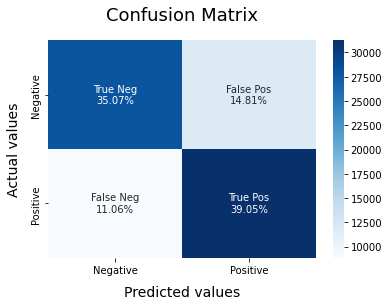

In [70]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=200, max_depth=15)
random_forest_model.fit(X_train, y_train)
model_evaluation(random_forest_model)

Logistic Regression

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     39909
           1       0.81      0.81      0.81     40091

    accuracy                           0.81     80000
   macro avg       0.81      0.81      0.81     80000
weighted avg       0.81      0.81      0.81     80000



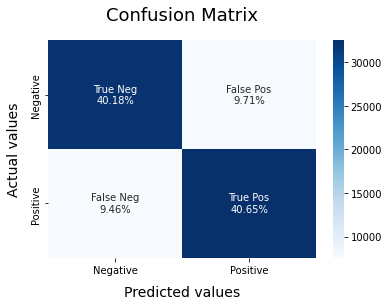

In [71]:
from sklearn.linear_model import LogisticRegression 
logistic_regression_model = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
logistic_regression_model.fit(X_train, y_train)
model_evaluation(logistic_regression_model)

Linear SVC

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     39909
           1       0.80      0.80      0.80     40091

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



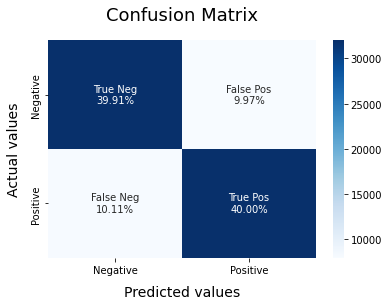

In [72]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC()
svc_model.fit(X_train, y_train)
model_evaluation(svc_model) 

XGBoost

              precision    recall  f1-score   support

           0       0.74      0.62      0.67     39909
           1       0.67      0.79      0.73     40091

    accuracy                           0.70     80000
   macro avg       0.71      0.70      0.70     80000
weighted avg       0.71      0.70      0.70     80000



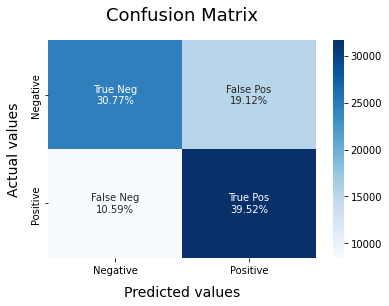

In [75]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
model_evaluation(xgb_classifier)